# Simple Charting

Thus far we have mainly been looking at simple data tables, but in mamy cases, a data visualisation may help us see patterns in the data more easily, particulalry when the data is appropriately sorted.

Simple, "direct" charts directly represent the contents of a data table in a visual form.

In many cases, we can plot simple charts directly from a *pandas* dataframe using the dataframe `.plot()` method. This has the advantage of being quick and self-contained, but it can be rather limiting at times compared to plotting libraries based more strictly on grammar of graphics approaches or that are specifically developed to support the production and presentation of statistical charts.

We'll cover some other charting approaches in a later conversation, but for now, let's see what we can do with some quick and dirty *pandas* plots ([*chart visualisation* docs](https://pandas.pydata.org/docs/user_guide/visualization.html) and [`.plot()` docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

## Simple *pandas* charts

Let's start with some simple bar charts that visualise course numbers. We've already seen how we can get a top 10 list of courses by course population a year in, so let's regenerate that data.

We'll start by getting some base data in:

In [1]:
import pandas as pd

ukprns = pd.read_excel("UNISTATS_UKPRN_lookup_20160901.xlsx", "Lookup")

course_df = pd.read_csv("on_2021_08_11_07_24_51/KISCOURSE.csv")
course_names = course_df[["UKPRN", "KISCOURSEID", "TITLE"]].drop_duplicates()

# Continuing student data
cont_df = pd.read_csv("on_2021_08_11_07_24_51/CONTINUATION.csv")

# Filter to appropriate aggregation level
cont_agg14_filter = cont_df["CONTAGG"]==14
cont_df = cont_df[cont_agg14_filter]

# Drop null values
cont_df.dropna(subset=["CONTPOP"], inplace=True)

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (3,5,7,10,22,25,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Set up various row and column filters:

In [2]:
cont_df = pd.merge(cont_df, ukprns, on="UKPRN")
cont_df = pd.merge(cont_df, course_names, on=["UKPRN", "KISCOURSEID"])

cont_full_time_filter = cont_df["KISMODE"]==1
cont_course_cols = ["NAME", "TITLE", "KISMODE", "CONTPOP"]

Preview the top 10 data for full time courses with no aggregation:

In [3]:
cont_top10_df = cont_df[cont_full_time_filter] \
                    [cont_course_cols].sort_values("CONTPOP", ascending=False).head(10)

cont_top10_df

,NAME,TITLE,KISMODE,CONTPOP
7707,The University of Cambridge,Natural Sciences,1,580.0
8637,The University of the West of Scotland,Adult Nursing,1,570.0
2404,London School of Business and Management Limited,Business Management including Foundation Year,1,550.0
4110,The University of Liverpool,Law,1,530.0
1321,De Montfort University,Business and Management,1,480.0
6667,The University of Manchester,Medicine,1,435.0
4443,Birmingham City University,Nursing - Adult (January intake),1,420.0
4446,Birmingham City University,Nursing - Adult (September intake),1,420.0
4101,The University of Liverpool,Psychology,1,410.0
8518,The University of Newcastle-upon-Tyne,Medicine and Surgery,1,400.0


Since there is just a single numerical column, we can preview that as a bar chart:

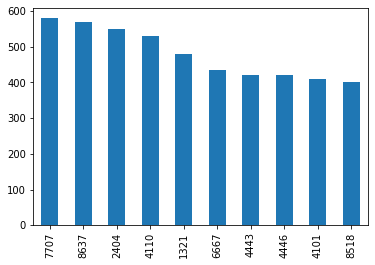

In [4]:
# The semicolon suppresses the display of some unwanted text 
cont_top10_df["CONTPOP"].plot(kind="bar");

Alternatively, we can plot a horizontal bar chart:

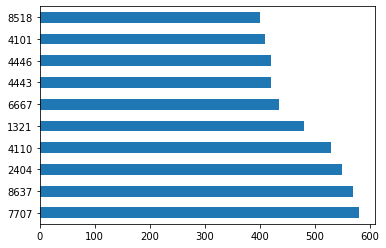

In [5]:
cont_top10_df["CONTPOP"].plot(kind="barh");

The descriptors for the bars are not very interesting - they correspond to the dataframe row index values. Let's create something more meaningful for the label:

In [6]:
# Create a function using an f-string to make a label from the course title and course provider name
labeller = lambda row: f'{row["TITLE"]} ({row["NAME"]})'

# Apply the function to each row of the dataframe
# Becuase there are multiple columns in the dataframe,
# we need to use `axis=1` to specify we want apply the function to each row rather than column
cont_top10_df["Label"] = cont_top10_df.apply(labeller, axis=1)

cont_top10_df

,NAME,TITLE,KISMODE,CONTPOP,Label
7707,The University of Cambridge,Natural Sciences,1,580.0,Natural Sciences (The University of Cambridge)
8637,The University of the West of Scotland,Adult Nursing,1,570.0,Adult Nursing (The University of the West of S...
2404,London School of Business and Management Limited,Business Management including Foundation Year,1,550.0,Business Management including Foundation Year ...
4110,The University of Liverpool,Law,1,530.0,Law (The University of Liverpool)
1321,De Montfort University,Business and Management,1,480.0,Business and Management (De Montfort University)
6667,The University of Manchester,Medicine,1,435.0,Medicine (The University of Manchester)
4443,Birmingham City University,Nursing - Adult (January intake),1,420.0,Nursing - Adult (January intake) (Birmingham C...
4446,Birmingham City University,Nursing - Adult (September intake),1,420.0,Nursing - Adult (September intake) (Birmingham...
4101,The University of Liverpool,Psychology,1,410.0,Psychology (The University of Liverpool)
8518,The University of Newcastle-upon-Tyne,Medicine and Surgery,1,400.0,Medicine and Surgery (The University of Newcas...


We can then apply this as the row indices:

In [7]:
cont_top10_df.set_index("Label", inplace=True)

cont_top10_df

,NAME,TITLE,KISMODE,CONTPOP
Label,,,,
Natural Sciences (The University of Cambridge),The University of Cambridge,Natural Sciences,1,580.0
Adult Nursing (The University of the West of Scotland),The University of the West of Scotland,Adult Nursing,1,570.0
Business Management including Foundation Year (London School of Business and Management Limited),London School of Business and Management Limited,Business Management including Foundation Year,1,550.0
Law (The University of Liverpool),The University of Liverpool,Law,1,530.0
Business and Management (De Montfort University),De Montfort University,Business and Management,1,480.0
Medicine (The University of Manchester),The University of Manchester,Medicine,1,435.0
Nursing - Adult (January intake) (Birmingham City University),Birmingham City University,Nursing - Adult (January intake),1,420.0
Nursing - Adult (September intake) (Birmingham City University),Birmingham City University,Nursing - Adult (September intake),1,420.0
Psychology (The University of Liverpool),The University of Liverpool,Psychology,1,410.0


And if we plot the table again, these labels will be used for the chart labels:

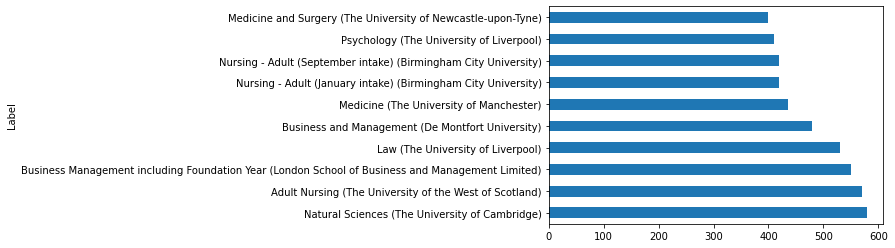

In [8]:
cont_top10_df["CONTPOP"].plot(kind="barh");

The chart's a bit naff, but it's a chart...

If we add in some entry level data, we can plot the entry and continuation data next to each other (note that we need to make sure we make a fair comparison by ensuring that data is merged in at the correct aggregation level [h/t DK]):

In [11]:
entry_df = pd.read_csv("on_2021_08_11_07_24_51/ENTRY.csv")

# Filter to appropriate aggregation level
#entry_agg14_filter = entry_df["ENTAGG"]==14
#entry_df = entry_df[cont_agg14_filter]
#Or we can merge on this...

# cont_df was already at agg14 level
cont_df = pd.merge(cont_df, entry_df[["UKPRN", "KISCOURSEID", "ENTPOP", "ENTAGG"]],
                   left_on=["UKPRN", "KISCOURSEID", "CONTAGG"],
                   right_on=["UKPRN", "KISCOURSEID", "ENTAGG"])

# Add the extra column to out column filter
cont_course_cols.append("ENTPOP")

In [12]:
# We also need to reset the cont_full_time_filter
cont_full_time_filter = cont_full_time_filter = cont_df["KISMODE"]==1

cont_top10_df2 = cont_df[cont_full_time_filter] \
                    [cont_course_cols].sort_values("CONTPOP", ascending=False).head(10)

cont_top10_df2["Label"] = cont_top10_df2.apply(labeller, axis=1)

cont_top10_df2.set_index("Label", inplace=True)

cont_top10_df2

,NAME,TITLE,KISMODE,CONTPOP,ENTPOP
Label,,,,,
Natural Sciences (The University of Cambridge),The University of Cambridge,Natural Sciences,1,580.0,565.0
Adult Nursing (The University of the West of Scotland),The University of the West of Scotland,Adult Nursing,1,570.0,605.0
Business Management including Foundation Year (London School of Business and Management Limited),London School of Business and Management Limited,Business Management including Foundation Year,1,550.0,805.0
Law (The University of Liverpool),The University of Liverpool,Law,1,530.0,465.0
Business and Management (De Montfort University),De Montfort University,Business and Management,1,480.0,395.0
Medicine (The University of Manchester),The University of Manchester,Medicine,1,435.0,455.0
Nursing - Adult (January intake) (Birmingham City University),Birmingham City University,Nursing - Adult (January intake),1,420.0,415.0
Nursing - Adult (September intake) (Birmingham City University),Birmingham City University,Nursing - Adult (September intake),1,420.0,415.0
Psychology (The University of Liverpool),The University of Liverpool,Psychology,1,410.0,305.0


Now let's plot the bar chart against the `ENTRY` and `CONTINUATION` populations:

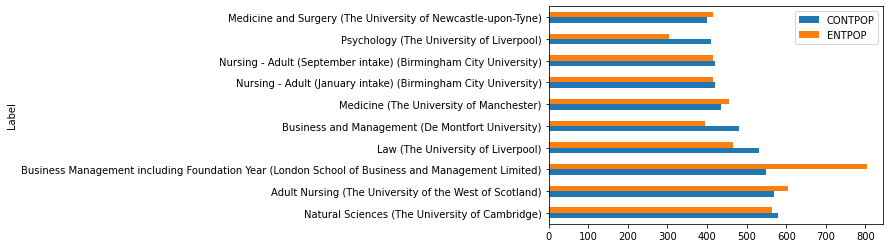

In [13]:
cont_top10_df2[["CONTPOP", "ENTPOP"]].plot(kind="barh");

A couple of things immediately jump out at us from this data: first, there's a large drop out from the Business Management course offered by the London School of Business and Management that includes the Foundation year. Secondly, in several cases, the courses seem to have more students continuing them than started them, presumably as a result of additional students moving onto those courses after the first year?

A scatter plot helps us see this relationship in more detail. Consider the top 100 courses:

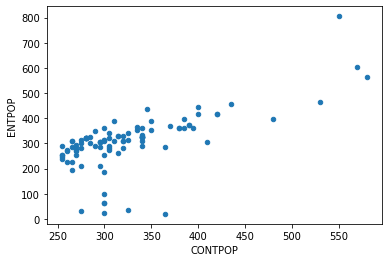

In [14]:
cont_df[cont_full_time_filter] \
                    [cont_course_cols].sort_values("CONTPOP", ascending=False) \
                    .head(100).plot(kind="scatter", x="CONTPOP", y="ENTPOP");

If we test whether the entry population is larger or smaller than the continuation population we can specify a desired plotting colour for each point:

In [15]:
colorme = lambda row: "red" if row['CONTPOP'] < row['ENTPOP'] else "blue"

cont_df['color'] =  cont_df.apply(colorme, axis=1)

cont_df[["CONTPOP", "ENTPOP", "color"]].head()

,CONTPOP,ENTPOP,color
0,30.0,30.0,blue
1,35.0,20.0,blue
2,30.0,40.0,red
3,15.0,25.0,red
4,25.0,35.0,red


We can use that to colour the points in the scatterplot:

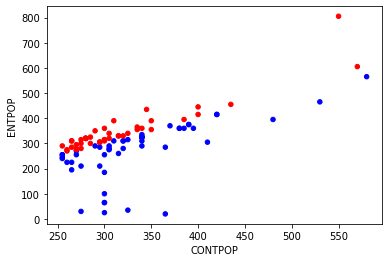

In [16]:
cont_100_df = cont_df[cont_full_time_filter] \
                        .sort_values("CONTPOP", ascending=False) \
                        .head(100)

cont_100_df.plot(kind="scatter",
                 x="CONTPOP", y="ENTPOP",
                 # Get a list of colors to apply to the points
                 c=cont_100_df["color"]
                );